In [3]:
from transformers import pipeline

In [4]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [5]:
ARTICLE = """
You don’t always have to give your boss the finger
Maybe it’s your first day on the job. Perhaps your manager just made an announcement. You’ve been asked to scan your fingerprint every time you clock in and out. Is that even allowed?
From Hooters to Hyatt Hotels, employers tantalized by the promise of a futuristic, streamlined way to track workers’ attendance are starting to use time clock machines that fingerprint employees.
Vendors like Kronos and Allied Time say that because the machines are tied to your biometric information — unique characteristics such as your face, fingerprints, how you talk, and even how you walk — they provide a higher level of workplace security and limit employees’ ability to commit “time theft” by punching in for one another.
But the benefits for your boss may come at a cost to you — both your privacy and possibly your health.
With the global outbreak of COVID-19, your personal health could be at risk when using frequently touched screens and fingerprint scanners. The Centers for Disease Control says that coronavirus can remain on surfaces for hours, so screens and scanners should be regularly disinfected with cleaning spray or wipes. And you should wash your hands for 20 seconds or use alcohol-based hand sanitizer immediately after using one.
In addition to these health concerns, critics argue that biometric devices pose massive personal security issues, exposing workers to potential identity theft and subjecting them to possible surveillance from corporations and law enforcement.
In an amicus brief in a case before a federal court of appeals, a group of privacy advocates, including the ACLU and the EFF, wrote that “the immutability of biometric information” puts people “at risk of irreparable harm in the form of identity theft and/or tracking.”
“You can get a new phone, you can change your password, you can even change your Social Security number; you can’t change your face,” said Kade Crockford, the Technology for Liberty program director at ACLU of Massachusetts.
Companies facing legal action over their use of the machines range from fast food joints like McDonald’s and Wendy’s, to hotel chains like Marriott and Hyatt, to airlines like United and Southwest.
In some cases, the companies have countered in the lawsuits that their employees’ union agreement allows the use of the machines: “Southwest and United contend that the plaintiffs’ unions have consented — either expressly or through the collective bargaining agreements’ management-rights clauses — and that any required notice has been provided to the unions,” the court’s opinion states.
Other companies have not responded to requests for comment or have said they cannot comment on active litigation.
Privacy and labor laws have lagged behind the shifts in the American workplace. But in some places, you have the right to refuse and even sue.

Biometric Privacy Laws
As the collection and use of biometrics has exploded, lawmakers in three states have responded by passing laws restricting its deployment.
"""

In [6]:
summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False)

[{'summary_text': ' Employers are starting to use time clock machines that fingerprint employees . The machines are tied to your unique characteristics such as your face, fingerprints, how you talk, and even how you walk . The Centers for Disease Control says that coronavirus can remain on surfaces for hours .'}]

In [7]:
ARTICLE1 = """
Nine people were killed Tuesday night amidst incidents of firing and arson in the Aigijang village of Manipur’s Kangpokpi district. This is the largest casualty in a single incident in the continuing incidents of violence in the state in the last few weeks.

According to the Superintendent of Police, Imphal East, the incident took place at around 10.30 pm on Tuesday. While Aigijang falls under the Kangpokpi revenue district, it comes under the jurisdiction of Imphal East, lying at the border of these two districts.

While Aigijang is a Kuki village, the nine bodies which were recovered were of Meitei men who were not residents of the village. According to police, these were “local volunteers”.
"""

In [8]:
summarizer(ARTICLE1, max_length=130, min_length=30, do_sample=False)

[{'summary_text': ' This is the largest casualty in a single incident in the continuing incidents of violence in the state in the last few weeks . While Aigijang is a Kuki village, the bodies which were recovered were of Meitei men who were not residents of the village . According to police, these were ‘local volunteers’'}]

In [49]:
%%time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import spacy
import re
import string
from spacy.lang.en import English
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests

CPU times: total: 0 ns
Wall time: 0 ns


In [50]:
news_data = pd.read_csv("newsdataset.csv",encoding='utf-8')

In [51]:
news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [52]:
news_data.dropna(axis=0,inplace=True)

In [53]:
subset_data = news_data.sample(n=100, random_state=42)

In [54]:
subset_data.shape

(100, 5)

In [55]:
subset_data.reset_index(drop=True)

,id,title,author,text,label
0,11784,Russian Spies and Americas Reality TV Electio...,Finian Cunningham,Russian Spies and Americas Reality TV Electi...,1
1,6997,A Peek Inside the Strange World of Fake Academ...,Kevin Carey,The caller ID on my office telephone said the ...,0
2,14903,A Rediscovered Mark Twain Fairy Tale Is Coming...,Alexandra Alter,"One night nearly 140 years ago, Samuel Clemens...",0
3,14381,’Gays for Trump’ Banned from Participating in ...,Katherine Rodriguez,Members of a gay group say they have been ba...,0
4,16567,SNIP creó mercado negro e informal,voltairenet.org,Páginas Libres\nSNIP creó mercado negro e info...,1
...,...,...,...,...,...
95,2360,"Islam Karimov Dies at 78, Ending a Long, Ruthl...",Neil MacFarquhar,"MOSCOW — Islam Karimov, a ruthless autocrat...",0
96,7754,Amy Schumer Netflix Special Flooded with One-S...,Jerome Hudson,Amy Schumer’s latest comedy special for Netf...,0
97,16839,Protesters Clash After Mount Greenwood Police-...,Henry Wolff,Protesters Clash After Mount Greenwood Police-...,1
98,2818,"New England Patriots, Lady Gaga: Your Thursday...",Karen Zraick and Sandra Stevenson,(Want to get this briefing by email? Here’s th...,0


In [56]:
nlp = spacy.load('en_core_web_sm', disable = ['ner', 'parser'])

In [57]:
tokenizer_text = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

In [58]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [59]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [60]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [61]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer_text.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [62]:
def normalize_corpus(corpus, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [63]:
subset_data['cleaned_text'] = normalize_corpus(subset_data['text'])

In [64]:
norm_corpus = list(subset_data['cleaned_text'])

In [79]:
subset_data.head()

,id,title,author,text,label,cleaned_text,abstractive_summary
11784,11784,Russian Spies and Americas Reality TV Electio...,Finian Cunningham,Russian Spies and Americas Reality TV Electi...,1,russian spy america reality tv election finian...,russian spy america reality tv election call f...
6997,6997,A Peek Inside the Strange World of Fake Academ...,Kevin Carey,The caller ID on my office telephone said the ...,0,caller office telephone say number las vegas I...,caller office telephone say number las vegas I...
14903,14903,A Rediscovered Mark Twain Fairy Tale Is Coming...,Alexandra Alter,"One night nearly 140 years ago, Samuel Clemens...",0,one night nearly year ago samuel clemen tell y...,john bird search twain archive university cali...
14381,14381,’Gays for Trump’ Banned from Participating in ...,Katherine Rodriguez,Members of a gay group say they have been ba...,0,member gay group say ban participate charlotte...,member gay group say ban participate charlotte...
16567,16567,SNIP creó mercado negro e informal,voltairenet.org,Páginas Libres\nSNIP creó mercado negro e info...,1,paginas libre snip creo mercado negro e inform...,el sistema nacional de inversion publica snip ...


## Abstractive summary

In [80]:

from transformers import T5Tokenizer, T5ForConditionalGeneration
def generate_abstractive_summaries(data, column_name, model_name="t5-small", max_length=50):
    tokenizer = T5Tokenizer.from_pretrained(model_name)
    model = T5ForConditionalGeneration.from_pretrained(model_name)
    summaries = []

    for text in subset_data['cleaned_text']:
        inputs = tokenizer.batch_encode_plus(["summarize: " + text], max_length=1024, return_tensors="pt", pad_to_max_length=True)  # Batch size 1
        outputs = model.generate(inputs['input_ids'], num_beams=4, max_length=max_length, early_stopping=True)
        summary = tokenizer.decode(outputs[0], skip_special_tokens=True, clean_up_tokenization_spaces=False)
        summaries.append(summary)

    return summaries

summaries = generate_summaries(subset_data, 'cleaned_text')

In [81]:
abstractive_summaries = generate_abstractive_summaries(subset_data, "cleaned_text")
subset_data["abstractive_summary"] = abstractive_summaries

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [82]:
subset_data["abstractive_summary"]=subset_data["abstractive_summary"]

In [83]:
subset_data

,id,title,author,text,label,cleaned_text,abstractive_summary
11784,11784,Russian Spies and Americas Reality TV Electio...,Finian Cunningham,Russian Spies and Americas Reality TV Electi...,1,russian spy america reality tv election finian...,russian spy america reality tv election call f...
6997,6997,A Peek Inside the Strange World of Fake Academ...,Kevin Carey,The caller ID on my office telephone said the ...,0,caller office telephone say number las vegas I...,caller office telephone say number las vegas I...
14903,14903,A Rediscovered Mark Twain Fairy Tale Is Coming...,Alexandra Alter,"One night nearly 140 years ago, Samuel Clemens...",0,one night nearly year ago samuel clemen tell y...,john bird search twain archive university cali...
14381,14381,’Gays for Trump’ Banned from Participating in ...,Katherine Rodriguez,Members of a gay group say they have been ba...,0,member gay group say ban participate charlotte...,member gay group say ban participate charlotte...
16567,16567,SNIP creó mercado negro e informal,voltairenet.org,Páginas Libres\nSNIP creó mercado negro e info...,1,paginas libre snip creo mercado negro e inform...,el sistema nacional de inversion publica snip ...
...,...,...,...,...,...,...,...
2360,2360,"Islam Karimov Dies at 78, Ending a Long, Ruthl...",Neil MacFarquhar,"MOSCOW — Islam Karimov, a ruthless autocrat...",0,moscow islam karimov ruthless autocrat rule uz...,moscow islam karimov ruthless autocrat rule uz...
7754,7754,Amy Schumer Netflix Special Flooded with One-S...,Jerome Hudson,Amy Schumer’s latest comedy special for Netf...,0,amy schumer late comedy special netflix leathe...,amy schumer comedy special netflix leather spe...
16839,16839,Protesters Clash After Mount Greenwood Police-...,Henry Wolff,Protesters Clash After Mount Greenwood Police-...,1,protester clash mount greenwood police involve...,protester clash mount greenwood police involve...
2818,2818,"New England Patriots, Lady Gaga: Your Thursday...",Karen Zraick and Sandra Stevenson,(Want to get this briefing by email? Here’s th...,0,want get briefing email good evening late pres...,want get briefing email good evening late pres...


## Extractive summarization

In [85]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from nltk.tokenize import sent_tokenize

In [86]:
def generate_extractive_summary(data, column_name, model_name="t5-small", num_sentences=2):
    tokenizer = T5Tokenizer.from_pretrained(model_name)
    model = T5ForConditionalGeneration.from_pretrained(model_name)
    summaries = []

    for text in data[column_name]:
        # Tokenize and encode the input text
        inputs = tokenizer.encode_plus(text, max_length=512, truncation=True, padding='longest', return_tensors="pt")
        input_ids = inputs.input_ids.to(model.device)
        attention_mask = inputs.attention_mask.to(model.device)

        # Generate sentence scores using the T5 model
        outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=512, num_beams=1)
        decoded_outputs = tokenizer.decode(outputs[0], skip_special_tokens=True)

        # Split the decoded outputs into sentences and calculate their scores
        sentences = sent_tokenize(decoded_outputs)
        scores = [len(sent) for sent in sentences]

        # Select top-scoring sentences
        top_sentence_indices = np.argsort(scores)[-num_sentences:][::-1]
        top_sentences = [sentences[idx] for idx in top_sentence_indices]
        summary = ' '.join(top_sentences)
        summaries.append(summary)

    return summaries


In [87]:
# Apply the extractive summarization function to your dataframe
extractive_summaries = generate_extractive_summary(subset_data, "cleaned_text")
subset_data["extractive_summary"] = extractive_summaries

In [88]:
extractive_summaries

['obama administration mainstream medium label trump russian fifth columnist obama also mock trump uniquely unqualified president access nuclear key notable us medium claim russian spying interference us election get trump elect white house base provocative allegation assessment make director national intelligence department homeland security word us accusation russian subversion could level serious way mean follow logic trump head occupy white house base provocative allegation assessment make director national intelligence department homeland security word us accusation russia',
 'good place good time paper accept within three hour omics employee identify sam dsouza say conference paper review expert within hour submission could provide list reviewer credential dispense academic standard omic deceive academic researcher nature publication hide publication fee range hundred thousand dollar omic also less business might call conference fraud lead call john scheme exploit fundamental wea

In [89]:
subset_data["extractive_summary"] = subset_data["extractive_summary"]

In [90]:
subset_data

,id,title,author,text,label,cleaned_text,abstractive_summary,extractive_summary
11784,11784,Russian Spies and Americas Reality TV Electio...,Finian Cunningham,Russian Spies and Americas Reality TV Electi...,1,russian spy america reality tv election finian...,russian spy america reality tv election call f...,obama administration mainstream medium label t...
6997,6997,A Peek Inside the Strange World of Fake Academ...,Kevin Carey,The caller ID on my office telephone said the ...,0,caller office telephone say number las vegas I...,caller office telephone say number las vegas I...,good place good time paper accept within three...
14903,14903,A Rediscovered Mark Twain Fairy Tale Is Coming...,Alexandra Alter,"One night nearly 140 years ago, Samuel Clemens...",0,one night nearly year ago samuel clemen tell y...,john bird search twain archive university cali...,fable twain inimitable voice scholar believe m...
14381,14381,’Gays for Trump’ Banned from Participating in ...,Katherine Rodriguez,Members of a gay group say they have been ba...,0,member gay group say ban participate charlotte...,member gay group say ban participate charlotte...,gay group say ban participate charlotte pride ...
16567,16567,SNIP creó mercado negro e informal,voltairenet.org,Páginas Libres\nSNIP creó mercado negro e info...,1,paginas libre snip creo mercado negro e inform...,el sistema nacional de inversion publica snip ...,el sistema de evitar el pbi nacional el pais r...
...,...,...,...,...,...,...,...,...
2360,2360,"Islam Karimov Dies at 78, Ending a Long, Ruthl...",Neil MacFarquhar,"MOSCOW — Islam Karimov, a ruthless autocrat...",0,moscow islam karimov ruthless autocrat rule uz...,moscow islam karimov ruthless autocrat rule uz...,karimov ruthless autocrat rule uzbekistan almo...
7754,7754,Amy Schumer Netflix Special Flooded with One-S...,Jerome Hudson,Amy Schumer’s latest comedy special for Netf...,0,amy schumer late comedy special netflix leathe...,amy schumer comedy special netflix leather spe...,schumer say beginning unapologetically raunchy...
16839,16839,Protesters Clash After Mount Greenwood Police-...,Henry Wolff,Protesters Clash After Mount Greenwood Police-...,1,protester clash mount greenwood police involve...,protester clash mount greenwood police involve...,november protester clash sunday afternoon near...
2818,2818,"New England Patriots, Lady Gaga: Your Thursday...",Karen Zraick and Sandra Stevenson,(Want to get this briefing by email? Here’s th...,0,want get briefing email good evening late pres...,want get briefing email good evening late pres...,smyrna del authority use backhoe storm dawn fi...


In [92]:
from textblob import TextBlob

def apply_sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    sentiment = 'positive' if sentiment_score > 0 else 'negative' if sentiment_score < 0 else 'neutral'
    return sentiment_score, sentiment


In [94]:
# Apply sentiment analysis to the abstractive text column
subset_data['abstractive_sentiment_score'], subset_data['abstractive_sentiment'] = zip(*subset_data['abstractive_summary'].apply(apply_sentiment_analysis))

In [95]:
# Apply sentiment analysis to the extractive text column
subset_data['extractive_sentiment_score'], subset_data['extractive_sentiment'] = zip(*subset_data['extractive_summary'].apply(apply_sentiment_analysis))

In [97]:
subset_data.head()

,id,title,author,text,label,cleaned_text,abstractive_summary,extractive_summary,abstractive_sentiment_score,abstractive_sentiment,extractive_sentiment_score,extractive_sentiment
11784,11784,Russian Spies and Americas Reality TV Electio...,Finian Cunningham,Russian Spies and Americas Reality TV Electi...,1,russian spy america reality tv election finian...,russian spy america reality tv election call f...,obama administration mainstream medium label t...,0.132857,positive,-0.043910,negative
6997,6997,A Peek Inside the Strange World of Fake Academ...,Kevin Carey,The caller ID on my office telephone said the ...,0,caller office telephone say number las vegas I...,caller office telephone say number las vegas I...,good place good time paper accept within three...,0.130000,positive,0.161026,positive
14903,14903,A Rediscovered Mark Twain Fairy Tale Is Coming...,Alexandra Alter,"One night nearly 140 years ago, Samuel Clemens...",0,one night nearly year ago samuel clemen tell y...,john bird search twain archive university cali...,fable twain inimitable voice scholar believe m...,0.375000,positive,-0.170076,negative
14381,14381,’Gays for Trump’ Banned from Participating in ...,Katherine Rodriguez,Members of a gay group say they have been ba...,0,member gay group say ban participate charlotte...,member gay group say ban participate charlotte...,gay group say ban participate charlotte pride ...,0.150000,positive,0.170996,positive
16567,16567,SNIP creó mercado negro e informal,voltairenet.org,Páginas Libres\nSNIP creó mercado negro e info...,1,paginas libre snip creo mercado negro e inform...,el sistema nacional de inversion publica snip ...,el sistema de evitar el pbi nacional el pais r...,0.000000,neutral,0.000000,neutral


In [98]:
cross_table = pd.crosstab(subset_data['extractive_sentiment'], subset_data['abstractive_sentiment'])

print(cross_table)

abstractive_sentiment  negative  neutral  positive
extractive_sentiment                              
negative                     15        4        11
neutral                       2        8         4
positive                     11        4        41


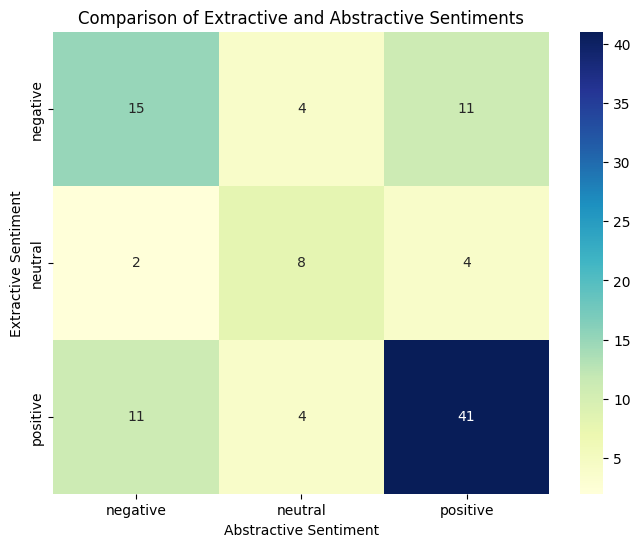

In [105]:
# Perform cross-tabulation on extractive and abstractive sentiments
cross_table = pd.crosstab(subset_data['extractive_sentiment'], subset_data['abstractive_sentiment'])

# Convert cross-tabulation table to DataFrame
cross_table_df = pd.DataFrame(cross_table)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_table_df, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Abstractive Sentiment')
plt.ylabel('Extractive Sentiment')
plt.title('Comparison of Extractive and Abstractive Sentiments')
plt.show()


In [107]:
subset_data.to_csv("sentiment_scores.csv")